In [2]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the data file
df = pd.read_csv('dailyActivity_merged.csv')
df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
#Feature engineering
df.drop(columns=['Wk','Date'],inplace=True)
df["binary_result"] = (df["FTR"] == "H").astype("int")
df["away_code"] = df["Away"].astype("category").cat.codes
df["home_code"] = df["Home"].astype("category").cat.codes
df.head(5)

,Season_End_Year,Home,HomeGoals,AwayGoals,Away,FTR,binary_result,away_code,home_code
0,1993,Coventry City,2,1,Middlesbrough,H,1,28,15
1,1993,Leeds United,2,1,Wimbledon,H,1,48,23
2,1993,Sheffield Utd,2,1,Manchester Utd,H,1,27,36
3,1993,Crystal Palace,3,3,Blackburn,D,0,4,16
4,1993,Arsenal,2,4,Norwich City,A,0,30,0


In [4]:
#Splitting the data to training and test data.
training_data = df[df['Season_End_Year'] < 2013]
test_data = df[df['Season_End_Year'] >= 2013]

In [5]:
#Training the logistic regression model. 
log_reg = LogisticRegression(class_weight = 'balanced', solver = 'newton-cholesky')

predictors = ["home_code", "away_code"]
X_train = training_data[predictors]
y_train = training_data["binary_result"]
X_test = test_data[predictors]
y_test = test_data["binary_result"]

log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

tr_error = log_loss(y_train, y_pred_train)
val_error = log_loss(y_test, y_pred_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("The training error is:", tr_error)
print("The validation error is:", val_error)
print("The training accuracy is:", train_accuracy)
print("The test accuracy is:", test_accuracy)

The training error is: 16.859572768042305
The validation error is: 17.478585028646044
The training accuracy is: 0.5322457303084375
The test accuracy is: 0.5150717703349282


[Text(0, 0.5, '0 - Home Loss/Draw'), Text(0, 1.5, '1 - Home Win')]

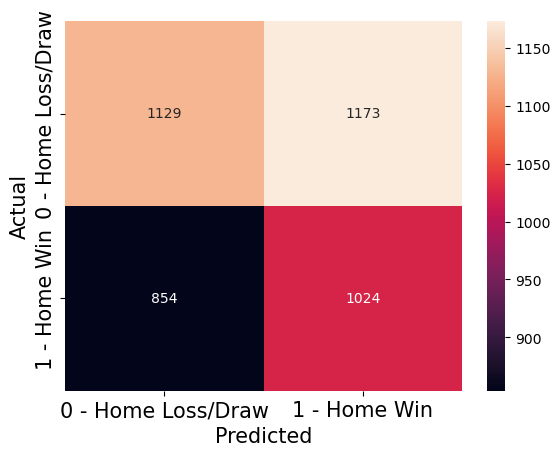

In [6]:
#Plotting a confusion matrix. 
conf_mat = confusion_matrix(y_test, y_pred_test)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
ax.xaxis.set_ticklabels(['0 - Home Loss/Draw', '1 - Home Win'],fontsize=15)
ax.yaxis.set_ticklabels(['0 - Home Loss/Draw', '1 - Home Win'],fontsize=15)

In [7]:
precision = (conf_mat[1][1])/(conf_mat[1][1] + conf_mat[0][1])

print('The precision of the model is: ',precision)

The precision of the model is:  0.46609012289485663


In [8]:
#Training a random forest classifier
rfc = RandomForestClassifier(min_samples_split = 30, random_state = 1)

rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("The training accuracy is:", train_accuracy)
print("The test accuracy is:", test_accuracy)

The training accuracy is: 0.6804741269436656
The test accuracy is: 0.6031100478468899


[Text(0, 0.5, '0 - Home Loss/Draw'), Text(0, 1.5, '1 - Home Win')]

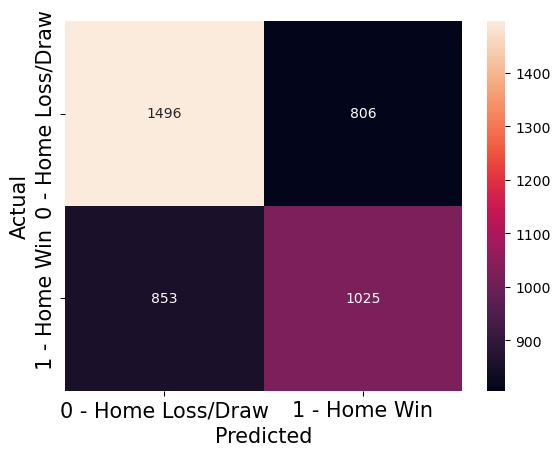

In [9]:
conf_mat = confusion_matrix(y_test, y_pred_test)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
ax.xaxis.set_ticklabels(['0 - Home Loss/Draw', '1 - Home Win'],fontsize=15)
ax.yaxis.set_ticklabels(['0 - Home Loss/Draw', '1 - Home Win'],fontsize=15)

In [10]:
precision = (conf_mat[1][1])/(conf_mat[1][1] + conf_mat[0][1])

print('The precision of the model is: ',precision)

The precision of the model is:  0.559803386127799
